In [1]:
import pandas as pd
import matplotlib.pyplot as plt

i = 7
path = f'outputs/agents_2/items_{i}/gpt4o/persona_based0/envy_output.csv'
df = pd.read_csv(path)
# get the last column 
envy = df.iloc[:,-2]

# get percent of True
percent = envy.value_counts(normalize=True)[True]
print(f'Items {i}: {percent:.2f}')

KeyError: True

Items 3: 0.41
Items 4: 0.51
Items 5: 0.69
Items 6: 0.68
Items 7: 0.60
Items 8: 0.70
Items 9: 0.71
Items 3: 0.43
Items 4: 0.62
Items 5: 0.67
Items 6: 0.73
Items 7: 0.72
Items 8: 0.76
Items 9: 0.74
[0.41, 0.51, 0.69, 0.68, 0.6, 0.7, 0.71]
[0.428, 0.624, 0.668, 0.726, 0.716, 0.758, 0.744]


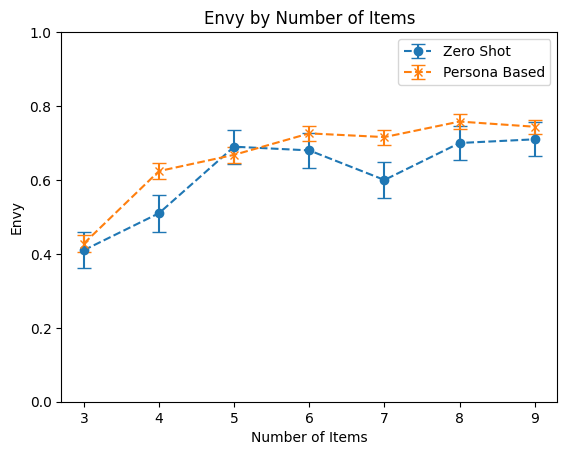

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# loop through configs
items_ag2_zero = []
items_ag2_zero_sde = []

for i in range(3, 10):
    # load csv
    path = f'outputs/agents_2/items_{i}/gpt4o/zero_shot0/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    envy = df['Envy_Freeness']

    # get percent of True
    percent = envy.mean()
    envy_std = envy.std()
    print(f'Items {i}: {percent:.2f}')

    items_ag2_zero.append(percent)
    items_ag2_zero_sde.append(envy_std / (len(envy) ** 0.5))


items_ag2_persona = []
items_ag2_persona_sde = []

for i in range(3, 10):
    # load csv
    path = f'outputs/agents_2/items_{i}/gpt4o/persona_based0/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    envy = df['Envy_Freeness']

    # get percent of True
    percent = envy.mean()
    envy_std = envy.std()
    print(f'Items {i}: {percent:.2f}')

    items_ag2_persona.append(percent)
    items_ag2_persona_sde.append(envy_std / (len(envy) ** 0.5))




print(items_ag2_zero)
print(items_ag2_persona)
# create line plot
plt.errorbar(range(3, 10), items_ag2_zero, yerr=items_ag2_zero_sde, label='Zero Shot', capsize=5, fmt ='o--')
plt.errorbar(range(3, 10), items_ag2_persona, yerr=items_ag2_persona_sde, label='Persona Based', capsize=5., fmt ='x--')
plt.xticks(range(3, 10))
plt.xticks(range(3, 10), [str(i) for i in range(3, 10)])
plt.ylim(0, 1)
plt.legend()
plt.xlabel('Number of Items')
plt.ylabel('Envy')
plt.title('Envy by Number of Items')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# # loop through configs
items_ag2 = []

llm_nws = []
llm_nws_ste = []
max_nws = []
max_nws_ste = []
llm_ews = []
llm_ews_ste = []
max_ews = []
max_ews_ste = []
llm_uws = []
llm_uws_ste = []
max_uws = []
max_uws_ste = []
i = 2


for j in range(1 + i, 10):
    # load csv
    path = f'outputs/agents_{i}/items_{j}/gpt4o/zero_shot0/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    llm_nash_welfare = df['LLM_Nash_Welfare']

    max_nash_welfare = df['Max_Nash_Welfare']

    llm_egaliarian_welfare = df['LLM_Egalitarian_Welfare']
    max_egalitarian_welfare = df['Max_Egalitarian_Welfare']

    llm_utilitarian_welfare = df['LLM_Utilitarian_Welfare']
    max_utilitarian_welfare = df['Max_Utilitarian_Welfare']

    # get proportions of welfare across trials
    llm_nws_prop = llm_nash_welfare / max_nash_welfare

    llm_nws.append(llm_nws_prop.mean())
    llm_nws_ste.append(llm_nws_prop.std() / (len(llm_nws_prop) ** 0.5))

    max_nws.append(max_nash_welfare.mean())
    max_nws_ste.append(max_nash_welfare.std() / (len(max_nash_welfare) ** 0.5))
    llm_ews.append(llm_egaliarian_welfare.mean())
    llm_ews_ste.append(llm_egaliarian_welfare.std() / (len(llm_egaliarian_welfare) ** 0.5))
    max_ews.append(max_egalitarian_welfare.mean())
    max_ews_ste.append(max_egalitarian_welfare.std() / (len(max_egalitarian_welfare) ** 0.5))
    llm_uws.append(llm_utilitarian_welfare.mean())
    llm_uws_ste.append(llm_utilitarian_welfare.std() / (len(llm_utilitarian_welfare) ** 0.5))
    max_uws.append(max_utilitarian_welfare.mean())
    max_uws_ste.append(max_utilitarian_welfare.std() / (len(max_utilitarian_welfare) ** 0.5))

    # get proportions of welfare
    llm_nws_prop = llm_nash_welfare.mean() / max_nash_welfare.mean()
    llm_ews_prop = llm_egaliarian_welfare.mean() / max_egalitarian_welfare.mean()
    llm_uws_prop = llm_utilitarian_welfare.mean() / max_utilitarian_welfare.mean()

    print(f'Items {j}: Proportion of LLM Nash Welfare: {llm_nws_prop:.2f}, Proportion of LLM Egalitarian Welfare: {llm_ews_prop:.2f}, Proportion of LLM Utilitarian Welfare: {llm_uws_prop:.2f}')

import os


# Ensure the directory exists
os.makedirs('./plots/welfare', exist_ok=True)

# Save Nash Welfare plot
# plt.plot(range(1 + i, 10), llm_nws, 'o--', label='LLM Nash Welfare')
plt.errorbar(range(1 + i, 10), llm_nws, yerr=llm_nws_ste, capsize=5, fmt='o--', label='LLM Nash Welfare (with error bars)')
# plt.errorbar(range(1 + i, 10), max_nws, yerr=max_nws_ste, capsize=5, fmt='o--', label='Max Nash Welfare (with error bars)')
# plt.plot(range(1 + i, 10), max_nws, 'o--', label='Max Nash Welfare')
plt.xlabel('Number of Items')
plt.ylabel('Nash Welfare (Scientific Notation)')
plt.title(f'Nash Welfare by Number of Items for {i} Agents')
plt.legend()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # Use scientific notation for y-axis
plt.savefig(f'./plots/welfare/NashWelfareProp{i}.png')
plt.close()

# Save Egalitarian Welfare plot
plt.plot(range(1 + i, 10), llm_ews, 'o--', label='LLM Egalitarian Welfare')
plt.plot(range(1 + i, 10), max_ews, 'o--', label='Max Egalitarian Welfare')
plt.legend()
plt.xlabel('Number of Items')
plt.ylabel('Egalitarian Welfare')
plt.title(f'Egalitarian Welfare by Number of Items for {i} Agents')
plt.savefig(f'./plots/welfare/EgalitarianWelfare{i}.png')
plt.close()

# Save Utilitarian Welfare plot
plt.plot(range(1 + i, 10), llm_uws, 'o--', label='LLM Utilitarian Welfare')
plt.plot(range(1 + i, 10), max_uws, 'o--', label='Max Utilitarian Welfare')
plt.legend()
plt.xlabel('Number of Items')
plt.ylabel('Utilitarian Welfare')
plt.title(f'Utilitarian Welfare by Number of Items for {i} Agents')
plt.savefig(f'./plots/welfare/UtilitarianWelfare{i}.png')
plt.close()



Items 3: Proportion of LLM Nash Welfare: 0.86, Proportion of LLM Egalitarian Welfare: 0.75, Proportion of LLM Utilitarian Welfare: 0.95
Items 4: Proportion of LLM Nash Welfare: 0.88, Proportion of LLM Egalitarian Welfare: 0.81, Proportion of LLM Utilitarian Welfare: 0.94
Items 5: Proportion of LLM Nash Welfare: 0.93, Proportion of LLM Egalitarian Welfare: 0.83, Proportion of LLM Utilitarian Welfare: 0.96
Items 6: Proportion of LLM Nash Welfare: 0.89, Proportion of LLM Egalitarian Welfare: 0.84, Proportion of LLM Utilitarian Welfare: 0.93
Items 7: Proportion of LLM Nash Welfare: 0.85, Proportion of LLM Egalitarian Welfare: 0.76, Proportion of LLM Utilitarian Welfare: 0.94
Items 8: Proportion of LLM Nash Welfare: 0.89, Proportion of LLM Egalitarian Welfare: 0.82, Proportion of LLM Utilitarian Welfare: 0.95
Items 9: Proportion of LLM Nash Welfare: 0.91, Proportion of LLM Egalitarian Welfare: 0.84, Proportion of LLM Utilitarian Welfare: 0.95


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# # loop through configs
items_ag2 = []

llm_nws = []
llm_nws_ste = []
max_nws = []
max_nws_ste = []
llm_ews = []
llm_ews_ste = []
max_ews = []
max_ews_ste = []
llm_uws = []
llm_uws_ste = []
max_uws = []
max_uws_ste = []
i = 2


for j in range(1 + i, 10):
    # load csv
    path = f'outputs/agents_{i}/items_{j}/gpt4o/zero_shot0/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    llm_nash_welfare = df['LLM_Nash_Welfare']

    max_nash_welfare = df['Max_Nash_Welfare']

    llm_egaliarian_welfare = df['LLM_Egalitarian_Welfare']
    max_egalitarian_welfare = df['Max_Egalitarian_Welfare']

    llm_utilitarian_welfare = df['LLM_Utilitarian_Welfare']
    max_utilitarian_welfare = df['Max_Utilitarian_Welfare']

    # get proportions of welfare across trials
    llm_nws_prop = llm_nash_welfare / max_nash_welfare

    llm_nws.append(llm_nws_prop.mean())
    llm_nws_ste.append(llm_nws_prop.std() / (len(llm_nws_prop) ** 0.5))
    

    llm_ews_prop = llm_egaliarian_welfare / max_egalitarian_welfare
    llm_ews.append(llm_ews_prop.mean())
    llm_ews_ste.append(llm_ews_prop.std() / (len(llm_ews_prop) ** 0.5))

    llm_uws_prop = llm_utilitarian_welfare / max_utilitarian_welfare
    llm_uws.append(llm_uws_prop.mean())
    llm_uws_ste.append(llm_uws_prop.std() / (len(llm_uws_prop) ** 0.5))
    

    # get proportions of welfare
    llm_nws_prop = llm_nash_welfare.mean() / max_nash_welfare.mean()
    llm_ews_prop = llm_egaliarian_welfare.mean() / max_egalitarian_welfare.mean()
    llm_uws_prop = llm_utilitarian_welfare.mean() / max_utilitarian_welfare.mean()

    print(f'Items {j}: Proportion of LLM Nash Welfare: {llm_nws_prop:.2f}, Proportion of LLM Egalitarian Welfare: {llm_ews_prop:.2f}, Proportion of LLM Utilitarian Welfare: {llm_uws_prop:.2f}')

import os


# Ensure the directory exists
os.makedirs('./plots/welfare', exist_ok=True)

# Save Nash Welfare plot
plt.errorbar(range(1 + i, 10), llm_nws, yerr=llm_nws_ste, capsize=5, fmt='o--', label='LLM Nash Welfare (with error bars)')
plt.errorbar(range(1 + i, 10), llm_uws, yerr=llm_uws_ste, capsize=5, fmt = 'o--', label='LLM Utilitarian Welfare (with error bars)')
plt.errorbar(range(1 + i, 10), llm_ews, yerr=llm_ews_ste, capsize=5, fmt = 'o--', label='LLM Egalitarian Welfare (with error bars)')

plt.xlabel('Number of Items')
plt.ylabel('Welfare Proportion')
plt.title('Proportion of Welfares produced by LLMs')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.savefig(f'./plots/welfare/WelfareProp{i}.png')
plt.close()

# # Save Egalitarian Welfare plot
# plt.errorbar(range(1 + i, 10), llm_ews, yerr=llm_ews_ste, capsize=5, fmt = 'o--', label='LLM Egalitarian Welfare (with error bars)')
# plt.legend()
# plt.xlabel('Number of Items')
# plt.ylabel('Egalitarian Welfare Proportion')
# plt.title('Proportion of Egalitarian Welfare produced by LLMs')
# plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
# plt.savefig(f'./plots/welfare/EgalitarianWelfareProp{i}.png')
# plt.close()

# # Save Utilitarian Welfare plot
# plt.errorbar(range(1 + i, 10), llm_uws, yerr=llm_uws_ste, capsize=5, fmt = 'o--', label='LLM Utilitarian Welfare (with error bars)')
# plt.legend()
# plt.xlabel('Number of Items')
# plt.ylabel('Utilitarian Welfare Proportion')
# plt.title('Proportion of Utilitarian Welfare produced by LLMs')
# plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
# plt.savefig(f'./plots/welfare/UtilitarianWelfareProp{i}.png')
# plt.close()



Items 3: Proportion of LLM Nash Welfare: 0.86, Proportion of LLM Egalitarian Welfare: 0.75, Proportion of LLM Utilitarian Welfare: 0.95
Items 4: Proportion of LLM Nash Welfare: 0.88, Proportion of LLM Egalitarian Welfare: 0.81, Proportion of LLM Utilitarian Welfare: 0.94
Items 5: Proportion of LLM Nash Welfare: 0.93, Proportion of LLM Egalitarian Welfare: 0.83, Proportion of LLM Utilitarian Welfare: 0.96
Items 6: Proportion of LLM Nash Welfare: 0.89, Proportion of LLM Egalitarian Welfare: 0.84, Proportion of LLM Utilitarian Welfare: 0.93
Items 7: Proportion of LLM Nash Welfare: 0.85, Proportion of LLM Egalitarian Welfare: 0.76, Proportion of LLM Utilitarian Welfare: 0.94
Items 8: Proportion of LLM Nash Welfare: 0.89, Proportion of LLM Egalitarian Welfare: 0.82, Proportion of LLM Utilitarian Welfare: 0.95
Items 9: Proportion of LLM Nash Welfare: 0.91, Proportion of LLM Egalitarian Welfare: 0.84, Proportion of LLM Utilitarian Welfare: 0.95
